## Evaluation Metrics

Choosing the right evaluation method is going to first depend on what type of problem is being solved. Within the field of supervised machine learning, we will be looking at models in two categories — classification and regression.

- Regression allows us to answer questions like “how much?” or “how many?”. If your result is a real-value number then you are trying to solve a regression problem.

- Classification, on the other hand, allows us to say whether something belongs to one class or the other.

### Regression Metrics

#### MSE

- Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of a predictive model, especially in regression tasks.

- MSE measures the average squared difference between the estimated values and the actual value, it measures of how "close" the predicted values are to the actual values

- It penalizes larger prediction errors more heavily than smaller ones because of the squaring operation.

- The lower the MSE, the better the model's predictive performance. A perfect model would have an MSE of 0, indicating that the predicted values exactly match the actual values. However, in practice, a model's MSE will rarely be exactly 0.

- MSE is very sensitive to outliers and because of this will result in a very high error value even if few outliers are present in the otherwise well-fitted model.

##### Formula of MSE = (1/n) * Σ(y_i - ŷ_i)^2

- n is the number of data points in your dataset.
- y_i is the actual (ground truth) value of the target variable for the i-th data point.
- ŷ_i is the predicted value of the target variable for the i-th data point.

In [1]:
def mean_squared_error(actual_values, predicted_values):
    n = len(actual_values)
    squared_errors = [(actual_values[i] - predicted_values[i]) ** 2 for i in range(n)]
    mse = sum(squared_errors) / n
    return mse

# Example usage:
actual_values = [1.5, 2.7, 3.9, 5.1, 6.3]
predicted_values = [1.2, 2.5, 3.8, 5.0, 6.1]

mse_result = mean_squared_error(actual_values, predicted_values)
print("Mean Squared Error:", mse_result)

Mean Squared Error: 0.03800000000000002


#### MAE

- MAE (Mean Absolute Error) is a common metric used to evaluate the accuracy of regression models. It measures the average absolute difference between the predicted values and the actual (true) values.

- MAE is easy to understand and provides a straightforward measure of the average prediction error. It is particularly useful when outliers are present in the data, as it is less sensitive to extreme values compared to other error metrics such as the mean squared error (MSE).

- MAE is expressed in the same units as the target variable, making it easy to interpret and explain to non-technical stakeholders.

##### Formula of MAE = (1/n) * Σ|yᵢ - ŷᵢ|

- yᵢ represents the actual (true) value of the i-th data point.
- ŷᵢ represents the predicted value of the i-th data point.
- Σ represents the summation symbol, and we sum over all data points.
- n is the total number of data points.

In [6]:
def calculate_mae(actual_values, predicted_values):
    n = len(actual_values)
    absolute_errors = [abs(y_actual - y_pred) for y_actual, y_pred in zip(actual_values, predicted_values)]
    mae = sum(absolute_errors) / n
    return mae

# Example usage:
actual_values = [5, 10, 15, 20, 25]
predicted_values = [6, 11, 16, 19, 24]

mae_result = calculate_mae(actual_values, predicted_values)
print("Mean Absolute Error (MAE):", mae_result)

Mean Absolute Error (MAE): 1.0


#### RMSE

- Root Mean Squared Error (RMSE) is a metric used to measure the performance of a predictive model.

- It is calculated by taking the square root of the Mean Squared Error (MSE).

- RMSE is preferred over MSE because it has the same units as the quantity being predicted, making it more easily interpretable.

- RMSE gives relatively higher weight to large errors, meaning it is more sensitive to larger discrepancies between predicted and actual values.

##### Formula of RMSE = square_root( (1/n) * Σ(y_i - ŷ_i)^2 )

- n is the number of data points in your dataset.
- y_i is the actual (ground truth) value of the target variable for the i-th data point.
- ŷ_i is the predicted value of the target variable for the i-th data point.

In [2]:
import math

def root_mean_squared_error(actual_values, predicted_values):
    n = len(actual_values)
    squared_errors = [(actual_values[i] - predicted_values[i]) ** 2 for i in range(n)]
    mse = sum(squared_errors) / n
    rmse = math.sqrt(mse)
    return rmse

# Example usage:
actual_values = [1.5, 2.7, 3.9, 5.1, 6.3]
predicted_values = [1.2, 2.5, 3.8, 5.0, 6.1]

rmse_result = root_mean_squared_error(actual_values, predicted_values)
print("Root Mean Squared Error:", rmse_result)

Root Mean Squared Error: 0.19493588689617933


##### Usage Examples:

- Use MSE when comparing models or algorithms, especially in optimization problems where the model's loss function needs to be differentiable.

- MAE is useful when the magnitude of errors is essential and needs to be understood directly in the original units of the target variable.

- Use RMSE when you want a metric that directly represents the average magnitude of prediction errors in the original unit of the target variable. This is particularly useful for explaining the model's performance to non-technical stakeholders or when the scale of the target variable is important for decision-making.

In summary, both MSE, MAE and RMSE are valuable metrics to assess model performance, and the choice between them depends on the context, interpretability needs, and the level of detail required in the evaluation. RMSE is often preferred when you want a more intuitive and interpretable metric that aligns with the original scale of the target variable.

#### R-squared

- R-squared (R2) is a statistical measure that represents what proportion of the variance for a dependent variable is explained by the independent variable or variables.

- It is a metric that explains a relationship similar to correlation. But whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent your model captures the variance relationship between variables.

- For example, if the R2 of a model is 0.84, then approximately 84% of the observed variation can be explained by the model’s inputs.

- The resulting R² value ranges from 0 to 1. A value of 1 indicates that the regression model perfectly fits the data, explaining all the variability in the dependent variable. A value of 0 indicates that the model does not explain any of the variability and provides no improvement over using the mean as a predictor.

##### Formula of R-squared = 1 - (SSR / SST) = 1 - (Σ (ŷᵢ - yᵢ)² / Σ (yᵢ - ȳ)²)

- R-squared is the coefficient of determination (R-squared).
- SSR is the sum of squared residuals (also known as the sum of squared errors).
- SST is the total sum of squares.

In [3]:
def calculate_r_squared(actual_values, predicted_values):
    n = len(actual_values)
    mean_actual = sum(actual_values) / n
    ssr = sum((predicted_values[i] - actual_values[i]) ** 2 for i in range(n))
    sst = sum((actual_values[i] - mean_actual) ** 2 for i in range(n))
    
    r_squared = 1 - (ssr / sst)
    return r_squared

# Example usage:
actual_values = [1.5, 2.7, 3.9, 5.1, 6.3]
predicted_values = [1.2, 2.5, 3.8, 5.0, 6.1]

r_squared_result = calculate_r_squared(actual_values, predicted_values)
print("R-squared:", r_squared_result)

R-squared: 0.9868055555555556


#### Adjusted R-squared

- Adjusted R-squared (or Adjusted R²) is a modification of the regular R-squared (R²) that takes into account the number of predictor variables in a regression model.

- While R-squared measures the proportion of the variance in the dependent variable explained by the model, adjusted R-squared penalizes the addition of unnecessary predictors that do not significantly improve the model's performance.

##### Formula of Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - k - 1)]

- Adjusted R² is the adjusted coefficient of determination.
- R² is the regular R-squared value.
- n is the number of data points (sample size).
- k is the number of predictor variables (independent variables) in the model.

In [4]:
def calculate_adjusted_r_squared(actual_values, predicted_values, num_predictors):
    n = len(actual_values)
    
    # Calculate the regular R-squared
    total_sum_of_squares = sum((actual_values[i] - sum(actual_values) / n) ** 2 for i in range(n))
    sum_of_squared_residuals = sum((predicted_values[i] - actual_values[i]) ** 2 for i in range(n))
    r_squared = 1 - (sum_of_squared_residuals / total_sum_of_squares)
    
    # Calculate the Adjusted R-squared
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - num_predictors - 1)
    
    return adjusted_r_squared

# Example usage:
actual_values = [1.5, 2.7, 3.9, 5.1, 6.3]
predicted_values = [1.2, 2.5, 3.8, 5.0, 6.1]
num_predictors = 2  # Number of predictor variables in the model

adjusted_r_squared_result = calculate_adjusted_r_squared(actual_values, predicted_values, num_predictors)
print("Adjusted R-squared:", adjusted_r_squared_result)

Adjusted R-squared: 0.9736111111111112


##### Usage Examples:

R-squared (R²):

- Model Evaluation: R-squared is used to evaluate the performance of regression models. A high R-squared value indicates a good fit, suggesting accurate predictions and significant explanation of variability in the target variable. It measures how well the model explains the variance in the dependent variable.

- Comparing Models: R-squared allows for the comparison of multiple regression models. Choosing the model with the highest R-squared value ensures the most effective predictions and explanatory power among the candidate models.

Adjusted R-squared (Adjusted R²):

- Model Selection and Complexity: Adjusted R-squared is useful when comparing models with different numbers of predictor variables. It penalizes the inclusion of unnecessary variables and helps select a model that is both accurate and parsimonious, avoiding overfitting and the inclusion of irrelevant predictors.

- Regression Analysis: Adjusted R-squared aids in assessing the goodness of fit while controlling for the number of predictor variables in multiple regression analysis. It helps identify the most appropriate model that explains the variance while considering the significance and relevance of the predictors.

### Classification Metrics


#### Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification model. It compares the actual class labels of a set of data with the predicted class labels generated by the model. The matrix provides a detailed breakdown of the model's performance, enabling us to analyze the accuracy and effectiveness of the classification.

The confusion matrix is usually organized into a 2x2 table (for binary classification problems) and contains four key components:

- True Positives (TP): The number of instances correctly classified as positive (belonging to the positive class).
- False Positives (FP): The number of instances incorrectly classified as positive (predicted as positive but actually belonging to the negative class).
- True Negatives (TN): The number of instances correctly classified as negative (belonging to the negative class).
- False Negatives (FN): The number of instances incorrectly classified as negative (predicted as negative but actually belonging to the positive class).

#### Accuracy

- Accuracy is the most intuitive metric and can be defined as the number of test cases correctly classified divided by the total number of test cases. It answers the questions “Out of all the predictions our model made, what percentage were correct?”

- It comes with a major limitation. When it comes to unbalanced datasets, you can have high accuracy and still have a completely ineffective model.

- For instance, if we are detecting frauds in bank data, the ratio of fraud to non-fraud cases can be 1:99. If accuracy is used, the model will turn out to be 99% accurate by predicting all test cases as non-fraud. In this case, however, that would be useless

##### Formula of Accuracy = (Number of True Positives + Number of True Negatives) / Total Number of Instances

#### Precision

- Precision is the metric used to identify the correctness of classification. Precision answers the questions, “Out of all the times the model said an observation belonged to a class, how many times did it actually?”

- The greater the fraction, the higher is the precision, which means the better the ability of the model to correctly classify the positive class.

- A high precision score can be misleading because it only indicates the number of times the model predicted a positive and it was a true positive. Meaning that it tells you nothing about how many times the model predicted false but it was actually true.

- Precision is a good measure when the costs of False Positive is high.

##### Precision = True Positives / (True Positives + False Positives)

#### Recall

- Recall tells us the number of positive cases correctly identified out of the total number of positive cases. Recall answers the question, “Out of all an observation was part of the target class, what percentage of them did our model correctly identify?”

- A high recall can be misleading because it does not give you an indication of how many times that model predicted true when it was actually false.

- Recall is a good metric to use when the cost of false negative is high. Recall is also often called True Positive Rate or sensitivity.

##### Formula of Recall = True Positives / (True Positives + False Negatives)

Side Note: Precision and recall have an inverse relationship. As our recall goes up, our precision will go down, and vice versa. This is why it important to consider your problem and which error is less costly for your overall goal.

#### Specificity

- Specificity, sometimes called the True Negative rate, measures the proportion of negatives that are correctly identified. In other words, the proportion of observations who do not belong to the target class who are correctly identified as not belonging to the target class. 

- Similar to other measures discussed this measure also has the limitation of not presenting the full picture. For example, a model that always returns a negative test result will have a specificity of 100% because specificity does not consider false negatives.

##### Formula of Specificity = True Negatives / (True Negatives + False Positives)

#### F1 Score

- F1 score considers both precision and recall. It is the harmonic mean(average) of precision and recall.

- The highest possible value of an F-score is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.

- It is useful in cases where both recall and precision can be valuable.

##### F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

#### ROC & AUC


ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are evaluation metrics commonly used in binary classification tasks to assess the performance of a model, particularly in cases where the class distribution is imbalanced.

ROC Curve:

- The ROC curve is a graphical representation of the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) at various classification thresholds. The TPR is also known as sensitivity or recall (TPR = TP / (TP + FN)), and the FPR is calculated as (FPR = FP / (FP + TN)).

- The ROC curve plots the TPR (y-axis) against the FPR (x-axis) as the threshold for classifying positive instances is varied from 0 to 1. Each point on the curve corresponds to a specific threshold, and the curve illustrates how the model's performance changes as the threshold is adjusted. An ideal ROC curve hugs the top-left corner, indicating high TPR and low FPR.

AUC (Area Under the Curve):

- The AUC is a single scalar value that quantifies the overall performance of a binary classification model based on its ROC curve. It represents the area under the ROC curve and is a measure of the model's ability to distinguish between the positive and negative classes.

- The AUC ranges from 0 to 1, with 0.5 indicating a random classifier (no discriminative ability), and 1 indicating a perfect classifier that can perfectly separate the two classes. Generally, the higher the AUC, the better the model's ability to distinguish between the classes.

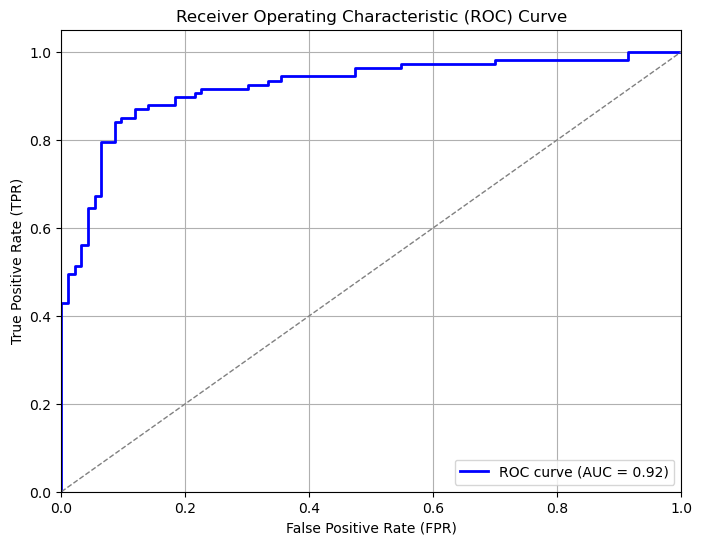

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()